In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import datetime as dt
import time
import numpy as np
import os
from os import path

#Get data directory
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#Establish database connection
client = MongoClient()
db = client.webScience

#Convert collection to dataframe for processing
col1 = db.twitterCol
set1 = pd.DataFrame(list(col1.find()))

#Conversion of date to UTC+8 (Singapore Time)
set1['created_at'] = ((pd.to_datetime(set1['created_at'], errors='coerce'))\
                        .dt.tz_localize('UTC').dt.tz_convert('Asia/Singapore'))\
                        .dt.strftime('%Y-%m-%d %H:%M:%S')

#Filter data that falls within the duration of running the twitter_crawler.py script
windowTime = (set1['created_at'] >= '2018-11-17 22:30:00') & (set1['created_at'] <= '2018-11-17 23:30:00')
data = (pd.DataFrame(set1.loc[windowTime])).reset_index(drop=True)

totalCollected = set1.API.value_counts()

print(f"Total no. of Tweets collected: \n{totalCollected}")
print(f"Total no. of USABLE Tweets collected: {len(data)}")

Total no. of Tweets collected: 
REST         77780
STREAMING      236
Name: API, dtype: int64
Total no. of USABLE Tweets collected: 8993


In [2]:
trueCounter = 0
falseCounter = 0

for x in range(len(data)) :
    try:
        y = data['place'][x]['country_code']
    except TypeError:
        y = "NA"
    
    if data['user'][x]['geo_enabled'] and y == "SG":
        trueCounter += 1
    else :
        falseCounter += 1
        
print(f"Total no. of geo-tagged enabled users in Singapore: {trueCounter}")

Total no. of geo-tagged enabled users in Singapore: 441


In [3]:
z = data['id_str'].duplicated()
dupCount = z[z == True].count()

print(f"Total no. of duplicated tweets: {dupCount}")

Total no. of duplicated tweets: 205


In [4]:
w = data['retweeted_status'].notnull()
retweets = w[w == True].count()

q = data['is_quote_status']
quotes = q[q == True].count()

print(f"Total no. of retweets: {retweets}")
print(f"Total no. of quotes: {quotes}")

Total no. of retweets: 6047
Total no. of quotes: 1286


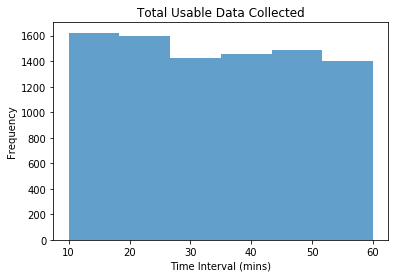

In [5]:
x = (pd.to_datetime((data['created_at']), errors='coerce'))

newTimeStamp=[]
for timeStamp in x:
    convertTimeStamp = str(timeStamp).split(" ")
    ts = convertTimeStamp[1].split(":")
    tempTS = int(ts[0] + ts[1])
    if (tempTS >= 2230 and tempTS <= 2240):
        newTimeStamp.append(10)
    elif (tempTS >= 2241 and tempTS <= 2250):
        newTimeStamp.append(20)
    elif (tempTS >= 2251 and tempTS <= 2300):
        newTimeStamp.append(30)
    elif (tempTS >= 2301 and tempTS <= 2310):
        newTimeStamp.append(40)
    elif (tempTS >= 2311 and tempTS <= 2320):
        newTimeStamp.append(50)
    else:
        newTimeStamp.append(60)   


plt.hist(newTimeStamp, bins=6, alpha=0.7)
plt.title(label="Total Usable Data Collected")
plt.xlabel("Time Interval (mins)")
plt.ylabel("Frequency")

# store to file
plt.savefig('Total Usable Data Collected.png')

plt.show()

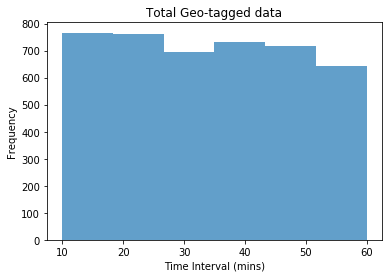

In [6]:
def geo(x):
    return x['geo_enabled']

u = map(geo, data['user'])
g1 = pd.DataFrame({'created_at':x, 'Geo_tagged':list(u)}, columns=['created_at', 'Geo_tagged'])

g2 = g1[g1.Geo_tagged == True].reset_index(drop=True).drop(columns='Geo_tagged')
g3 = pd.Series(g2['created_at'].values)

newTimeStamp=[]
for timeStamp in g3:
    convertTimeStamp = str(timeStamp).split(" ")
    ts = convertTimeStamp[1].split(":")
    tempTS = int(ts[0] + ts[1])
    if (tempTS >= 2230 and tempTS <= 2240):
        newTimeStamp.append(10)
    elif (tempTS >= 2241 and tempTS <= 2250):
        newTimeStamp.append(20)
    elif (tempTS >= 2251 and tempTS <= 2300):
        newTimeStamp.append(30)
    elif (tempTS >= 2301 and tempTS <= 2310):
        newTimeStamp.append(40)
    elif (tempTS >= 2311 and tempTS <= 2320):
        newTimeStamp.append(50)
    else:
        newTimeStamp.append(60)  


plt.hist(newTimeStamp, bins=6, alpha=0.7)
plt.title(label="Total Geo-tagged data")
plt.xlabel("Time Interval (mins)")
plt.ylabel("Frequency")

# store to file
plt.savefig('Total Geo-tagged.png')

plt.show()

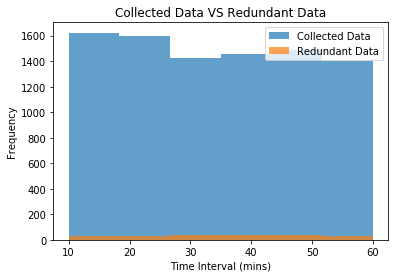

In [7]:
x = (pd.to_datetime((data['created_at']), errors='coerce'))

newTimeStamp=[]
for timeStamp in x:
    convertTimeStamp = str(timeStamp).split(" ")
    ts = convertTimeStamp[1].split(":")
    tempTS = int(ts[0] + ts[1])
    if (tempTS >= 2230 and tempTS <= 2240):
        newTimeStamp.append(10)
    elif (tempTS >= 2241 and tempTS <= 2250):
        newTimeStamp.append(20)
    elif (tempTS >= 2251 and tempTS <= 2300):
        newTimeStamp.append(30)
    elif (tempTS >= 2301 and tempTS <= 2310):
        newTimeStamp.append(40)
    elif (tempTS >= 2311 and tempTS <= 2320):
        newTimeStamp.append(50)
    else:
        newTimeStamp.append(60)   

plt.hist(newTimeStamp, bins=6, alpha=0.7, label='Collected Data')


g4 = pd.DataFrame({'created_at':x, 'isDuplicate':z}, columns=['created_at', 'isDuplicate'])
g4['isDuplicate'] = z
g5 = g4[g4.isDuplicate == True].reset_index(drop=True).drop(columns='isDuplicate')
g6 = pd.Series(g5['created_at'].values)

newTimeStamp2=[]
for timeStamp in g6:
    convertTimeStamp = str(timeStamp).split(" ")
    ts = convertTimeStamp[1].split(":")
    tempTS = int(ts[0] + ts[1])
    if (tempTS >= 2230 and tempTS <= 2240):
        newTimeStamp2.append(10)
    elif (tempTS >= 2241 and tempTS <= 2250):
        newTimeStamp2.append(20)
    elif (tempTS >= 2251 and tempTS <= 2300):
        newTimeStamp2.append(30)
    elif (tempTS >= 2301 and tempTS <= 2310):
        newTimeStamp2.append(40)
    elif (tempTS >= 2311 and tempTS <= 2320):
        newTimeStamp2.append(50)
    else:
        newTimeStamp2.append(60) 

plt.hist(newTimeStamp2, bins=6, alpha=0.7, label='Redundant Data')


plt.title(label="Collected Data VS Redundant Data")
plt.xlabel("Time Interval (mins)")
plt.ylabel("Frequency")
plt.legend(loc='upper right')

# store to file
plt.savefig('Total Redundant Data.png')

plt.show()

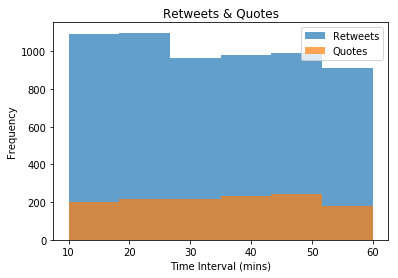

In [8]:
g7 = pd.DataFrame({'created_at':x, 'isRetweet':w}, columns=['created_at', 'isRetweet'])
g8 = g7[g7.isRetweet == True].reset_index(drop=True).drop(columns='isRetweet')
g9 = pd.Series(g8['created_at'].values)

newTimeStamp1=[]
for timeStamp in g9:
    convertTimeStamp = str(timeStamp).split(" ")
    ts = convertTimeStamp[1].split(":")
    tempTS = int(ts[0] + ts[1])
    if (tempTS >= 2230 and tempTS <= 2240):
        newTimeStamp1.append(10)
    elif (tempTS >= 2241 and tempTS <= 2250):
        newTimeStamp1.append(20)
    elif (tempTS >= 2251 and tempTS <= 2300):
        newTimeStamp1.append(30)
    elif (tempTS >= 2301 and tempTS <= 2310):
        newTimeStamp1.append(40)
    elif (tempTS >= 2311 and tempTS <= 2320):
        newTimeStamp1.append(50)
    else:
        newTimeStamp1.append(60) 

plt.hist(newTimeStamp1, bins=6, alpha=0.7, label='Retweets')


g10 = pd.DataFrame({'created_at':x, 'isQuote':q}, columns=['created_at', 'isQuote'])
g11 = g10[g10.isQuote == True].reset_index(drop=True).drop(columns='isQuote')
g12 = pd.Series(g11['created_at'].values)

newTimeStamp2=[]
for timeStamp in g12:
    convertTimeStamp = str(timeStamp).split(" ")
    ts = convertTimeStamp[1].split(":")
    tempTS = int(ts[0] + ts[1])
    if (tempTS >= 2230 and tempTS <= 2240):
        newTimeStamp2.append(10)
    elif (tempTS >= 2241 and tempTS <= 2250):
        newTimeStamp2.append(20)
    elif (tempTS >= 2251 and tempTS <= 2300):
        newTimeStamp2.append(30)
    elif (tempTS >= 2301 and tempTS <= 2310):
        newTimeStamp2.append(40)
    elif (tempTS >= 2311 and tempTS <= 2320):
        newTimeStamp2.append(50)
    else:
        newTimeStamp2.append(60) 

plt.hist(newTimeStamp2, bins=6, alpha=0.7, label='Quotes')

plt.legend(loc='upper right')
plt.title(label="Retweets & Quotes")
plt.xlabel("Time Interval (mins)")
plt.ylabel("Frequency")

# store to file
plt.savefig('Retweets and Quotes.png')

plt.show()

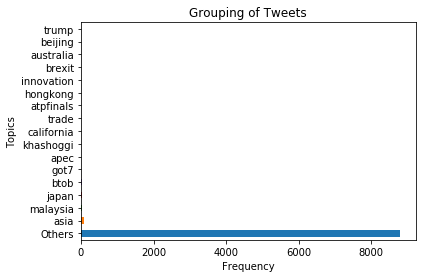

In [9]:
test = data.Trend_group.value_counts().plot(kind='barh')
plt.title(label="Grouping of Tweets")
plt.xlabel("Frequency")
plt.ylabel("Topics")

# store to file
plt.savefig('Grouping of Tweets.png')

In [10]:
data.Trend_group.value_counts()

Others        8784
asia            84
malaysia        35
japan           29
btob            22
got7             9
apec             5
khashoggi        4
california       4
trade            4
atpfinals        3
hongkong         2
innovation       2
brexit           2
australia        2
beijing          1
trump            1
Name: Trend_group, dtype: int64